# Census Income Project


### Importing the libraries


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("E:\Anuradha\datatrained\census_income.csv")
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
df.shape

(32560, 15)

In [5]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [ ]:
Preporcessing

In [6]:
df.info

<bound method DataFrame.info of        Age          Workclass  Fnlwgt    Education  Education_num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            Marital_status          Occupation    Relationship    Race  \
0       Married-civ-spouse     Exec-managerial         Husband   

<AxesSubplot:>

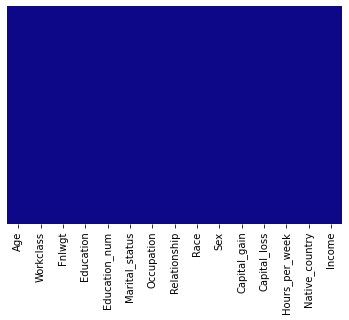

In [7]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="plasma")

In [8]:
# Unique Data:

df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [9]:
# Observation :

df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Observation of the columns:



In [10]:
df["Workclass"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [11]:
df["Occupation"].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [12]:
df["Native_country"].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

### Replace "?" with mode

In [13]:
df["Workclass"] = df["Workclass"].str.replace("?","Private")

df["Occupation"] = df["Occupation"].str.replace("?","Prof-specialty")

df["Native_country"] = df["Native_country"].str.replace("?","United-States")

In [14]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [15]:
nativ_percent = (df["Native_country"].value_counts()/df.shape[0])*100
print(nativ_percent)

 United-States                 91.375921
 Mexico                         1.974816
 Philippines                    0.608108
 Germany                        0.420762
 Canada                         0.371622
 Puerto-Rico                    0.350123
 El-Salvador                    0.325553
 India                          0.307125
 Cuba                           0.291769
 England                        0.276413
 Jamaica                        0.248771
 South                          0.245700
 China                          0.230344
 Italy                          0.224201
 Dominican-Republic             0.214988
 Vietnam                        0.205774
 Guatemala                      0.196560
 Japan                          0.190418
 Poland                         0.184275
 Columbia                       0.181204
 Taiwan                         0.156634
 Haiti                          0.135135
 Iran                           0.132064
 Portugal                       0.113636
 Nicaragua      

### Plot graph for further anlysis : 


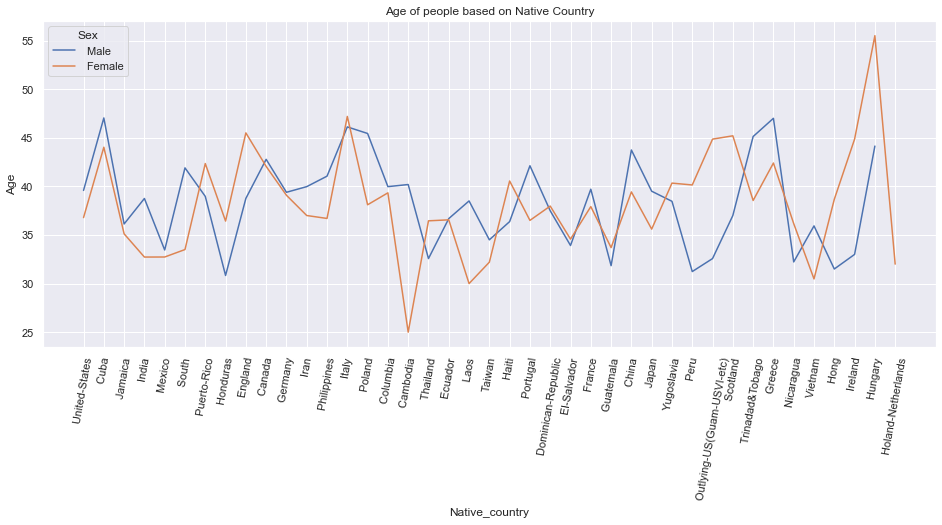

In [16]:
# Relation between Age of the population & Native country

plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
sns.lineplot(data=df, y="Age", x="Native_country", hue="Sex", ci=None).set(title='Age of people based on Native Country')
plt.xticks(rotation=80)
plt.show()

In [17]:
# Income count:

inc_percent = (df["Income"].value_counts()/df.shape[0])*100
print(inc_percent)

 <=50K    75.918305
 >50K     24.081695
Name: Income, dtype: float64


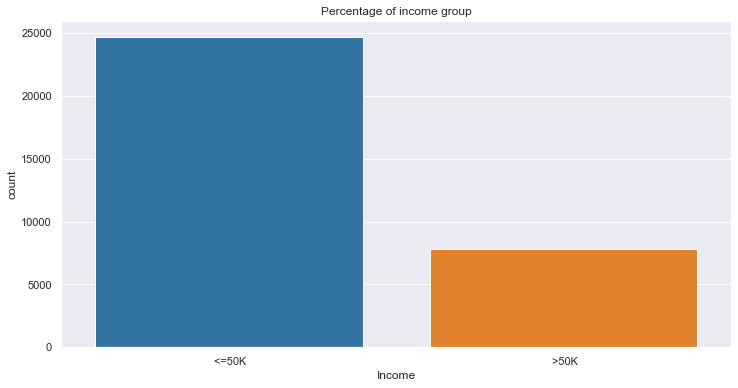

In [19]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Income", data=df, palette="tab10").set(title='Percentage of income group')

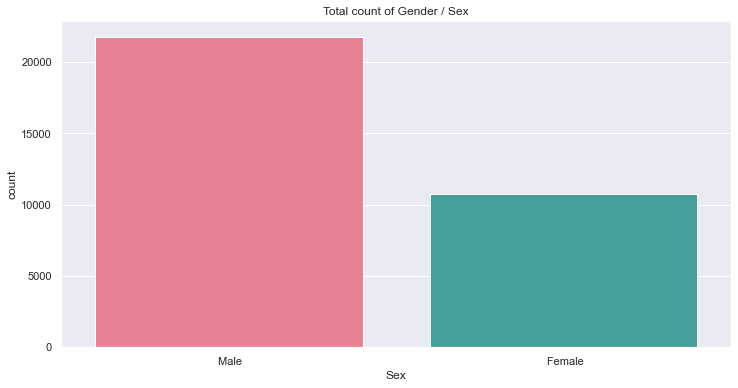

In [20]:
# Relation between the population & Sex


plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Sex", data=df, palette="husl").set(title='Total count of Gender / Sex')

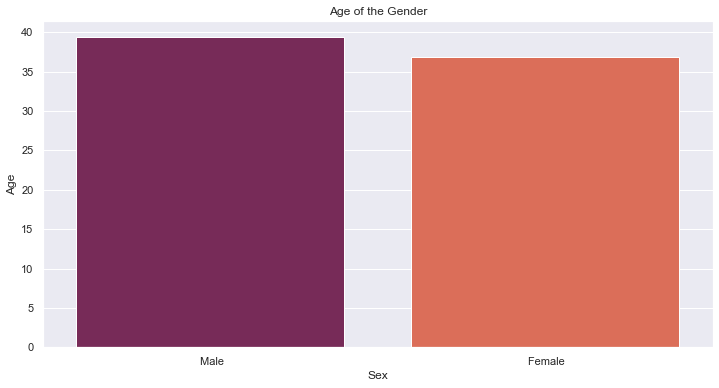

In [23]:
# # Relation between sex & Age of the Gender

plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")
ax = sns.barplot(x="Sex", y="Age", data=df, palette="rocket", ci=None, orient="v").set(title='Age of the Gender')

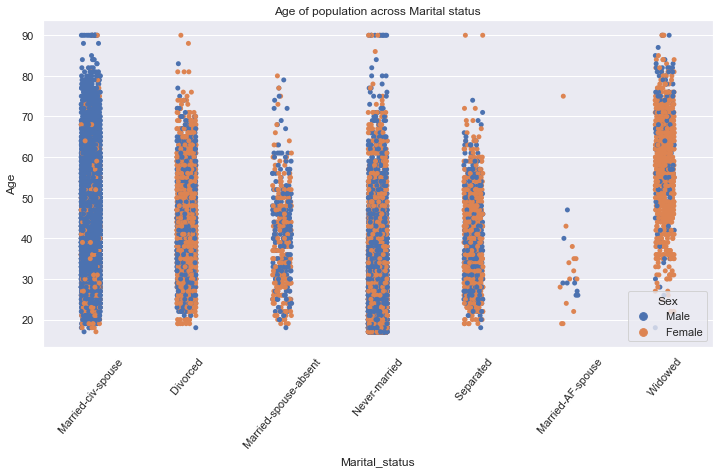

In [24]:
# Get Marital status

plt.figure(figsize=(12, 6))
ax = sns.stripplot(x="Marital_status", y="Age", data=df, hue="Sex").set(title='Age of population across Marital status')
plt.xticks(rotation=50)
plt.show()

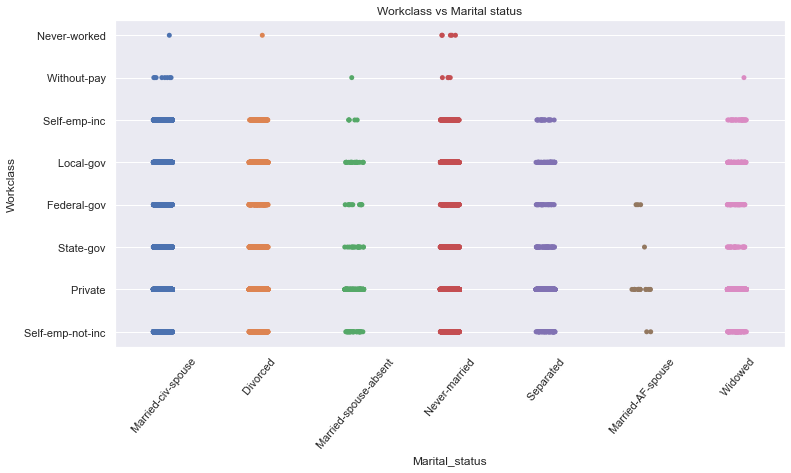

In [25]:
plt.figure(figsize=(12, 6))
ax = sns.stripplot(x="Marital_status", y="Workclass", data=df).set(title='Workclass vs Marital status')
plt.xticks(rotation=50)
plt.show()

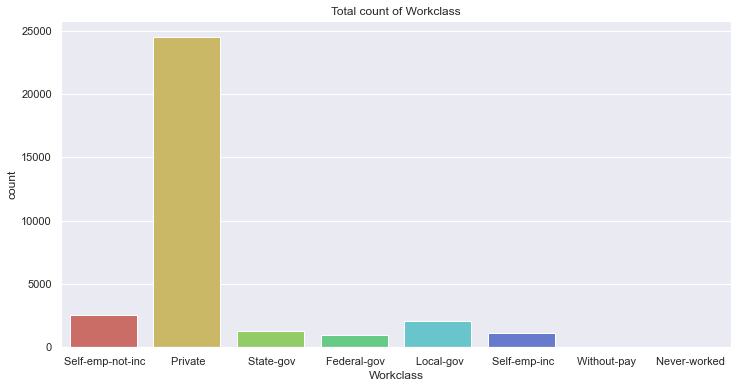

In [26]:
# All Working class :

plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Workclass", data=df, palette="hls").set(title='Total count of Workclass')

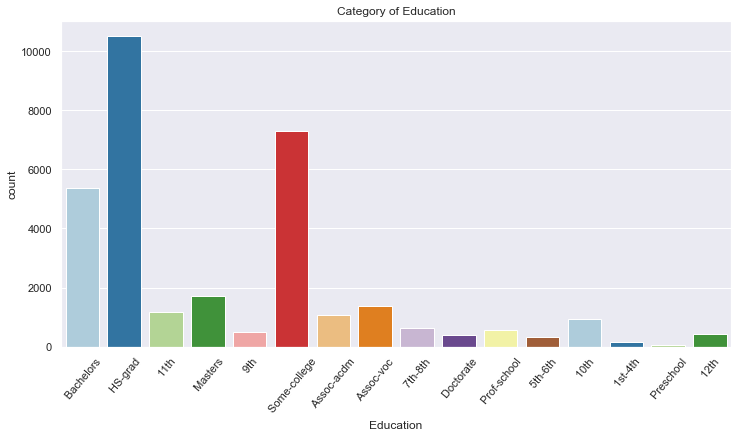

In [27]:
# Get Education Qualification

plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Education", data=df, palette="Paired").set(title='Category of Education')
plt.xticks(rotation=50)
plt.show()

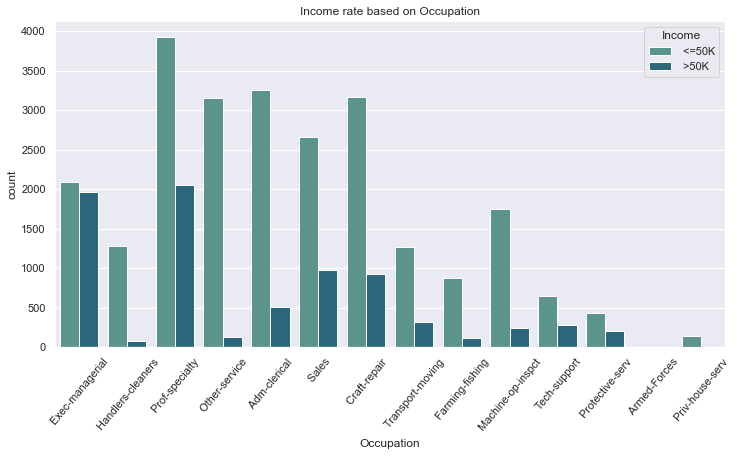

In [28]:
# Relationship between the Occupation and Income:

plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Occupation", data=df, palette="crest", hue="Income").set(title='Income rate based on Occupation')
plt.xticks(rotation=50)
plt.show()

### Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()

In [30]:
df_new1 = lab_enc.fit_transform(df["Workclass"])
df_new2 = lab_enc.fit_transform(df["Marital_status"])
df_new3 = lab_enc.fit_transform(df["Occupation"])
df_new4 = lab_enc.fit_transform(df["Relationship"])
df_new5 = lab_enc.fit_transform(df["Race"])
df_new6 = lab_enc.fit_transform(df["Sex"])
df_new7 = lab_enc.fit_transform(df["Native_country"])
df_new8 = lab_enc.fit_transform(df["Income"])

In [31]:
df["Workclass"] = df_new1
df["Marital_status"] = df_new2
df["Occupation"] = df_new3
df["Relationship"] = df_new4
df["Race"] = df_new5
df["Sex"] = df_new6
df["Native_country"] = df_new7
df["Income"] = df_new8

In [32]:
df["Education"].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [33]:
# creating the list of ordered fields to be passed for encoding

edu = [' Preschool',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th',' 11th',' 12th',' HS-grad',' Prof-school',' Assoc-acdm',' Assoc-voc',' Some-college',' Bachelors',' Masters',' Doctorate']

In [34]:
from sklearn.preprocessing import OrdinalEncoder

ord_encoder = OrdinalEncoder(categories=[edu])
df_new1_ord = ord_encoder.fit_transform(df[["Education"]])

In [35]:
# overriding the existing colum with new values post encoding

df["Education"] = df_new1_ord

df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,13.0,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,8.0,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,6.0,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,13.0,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,14.0,14,2,3,5,4,0,0,0,40,38,0


### Distribution of columns:

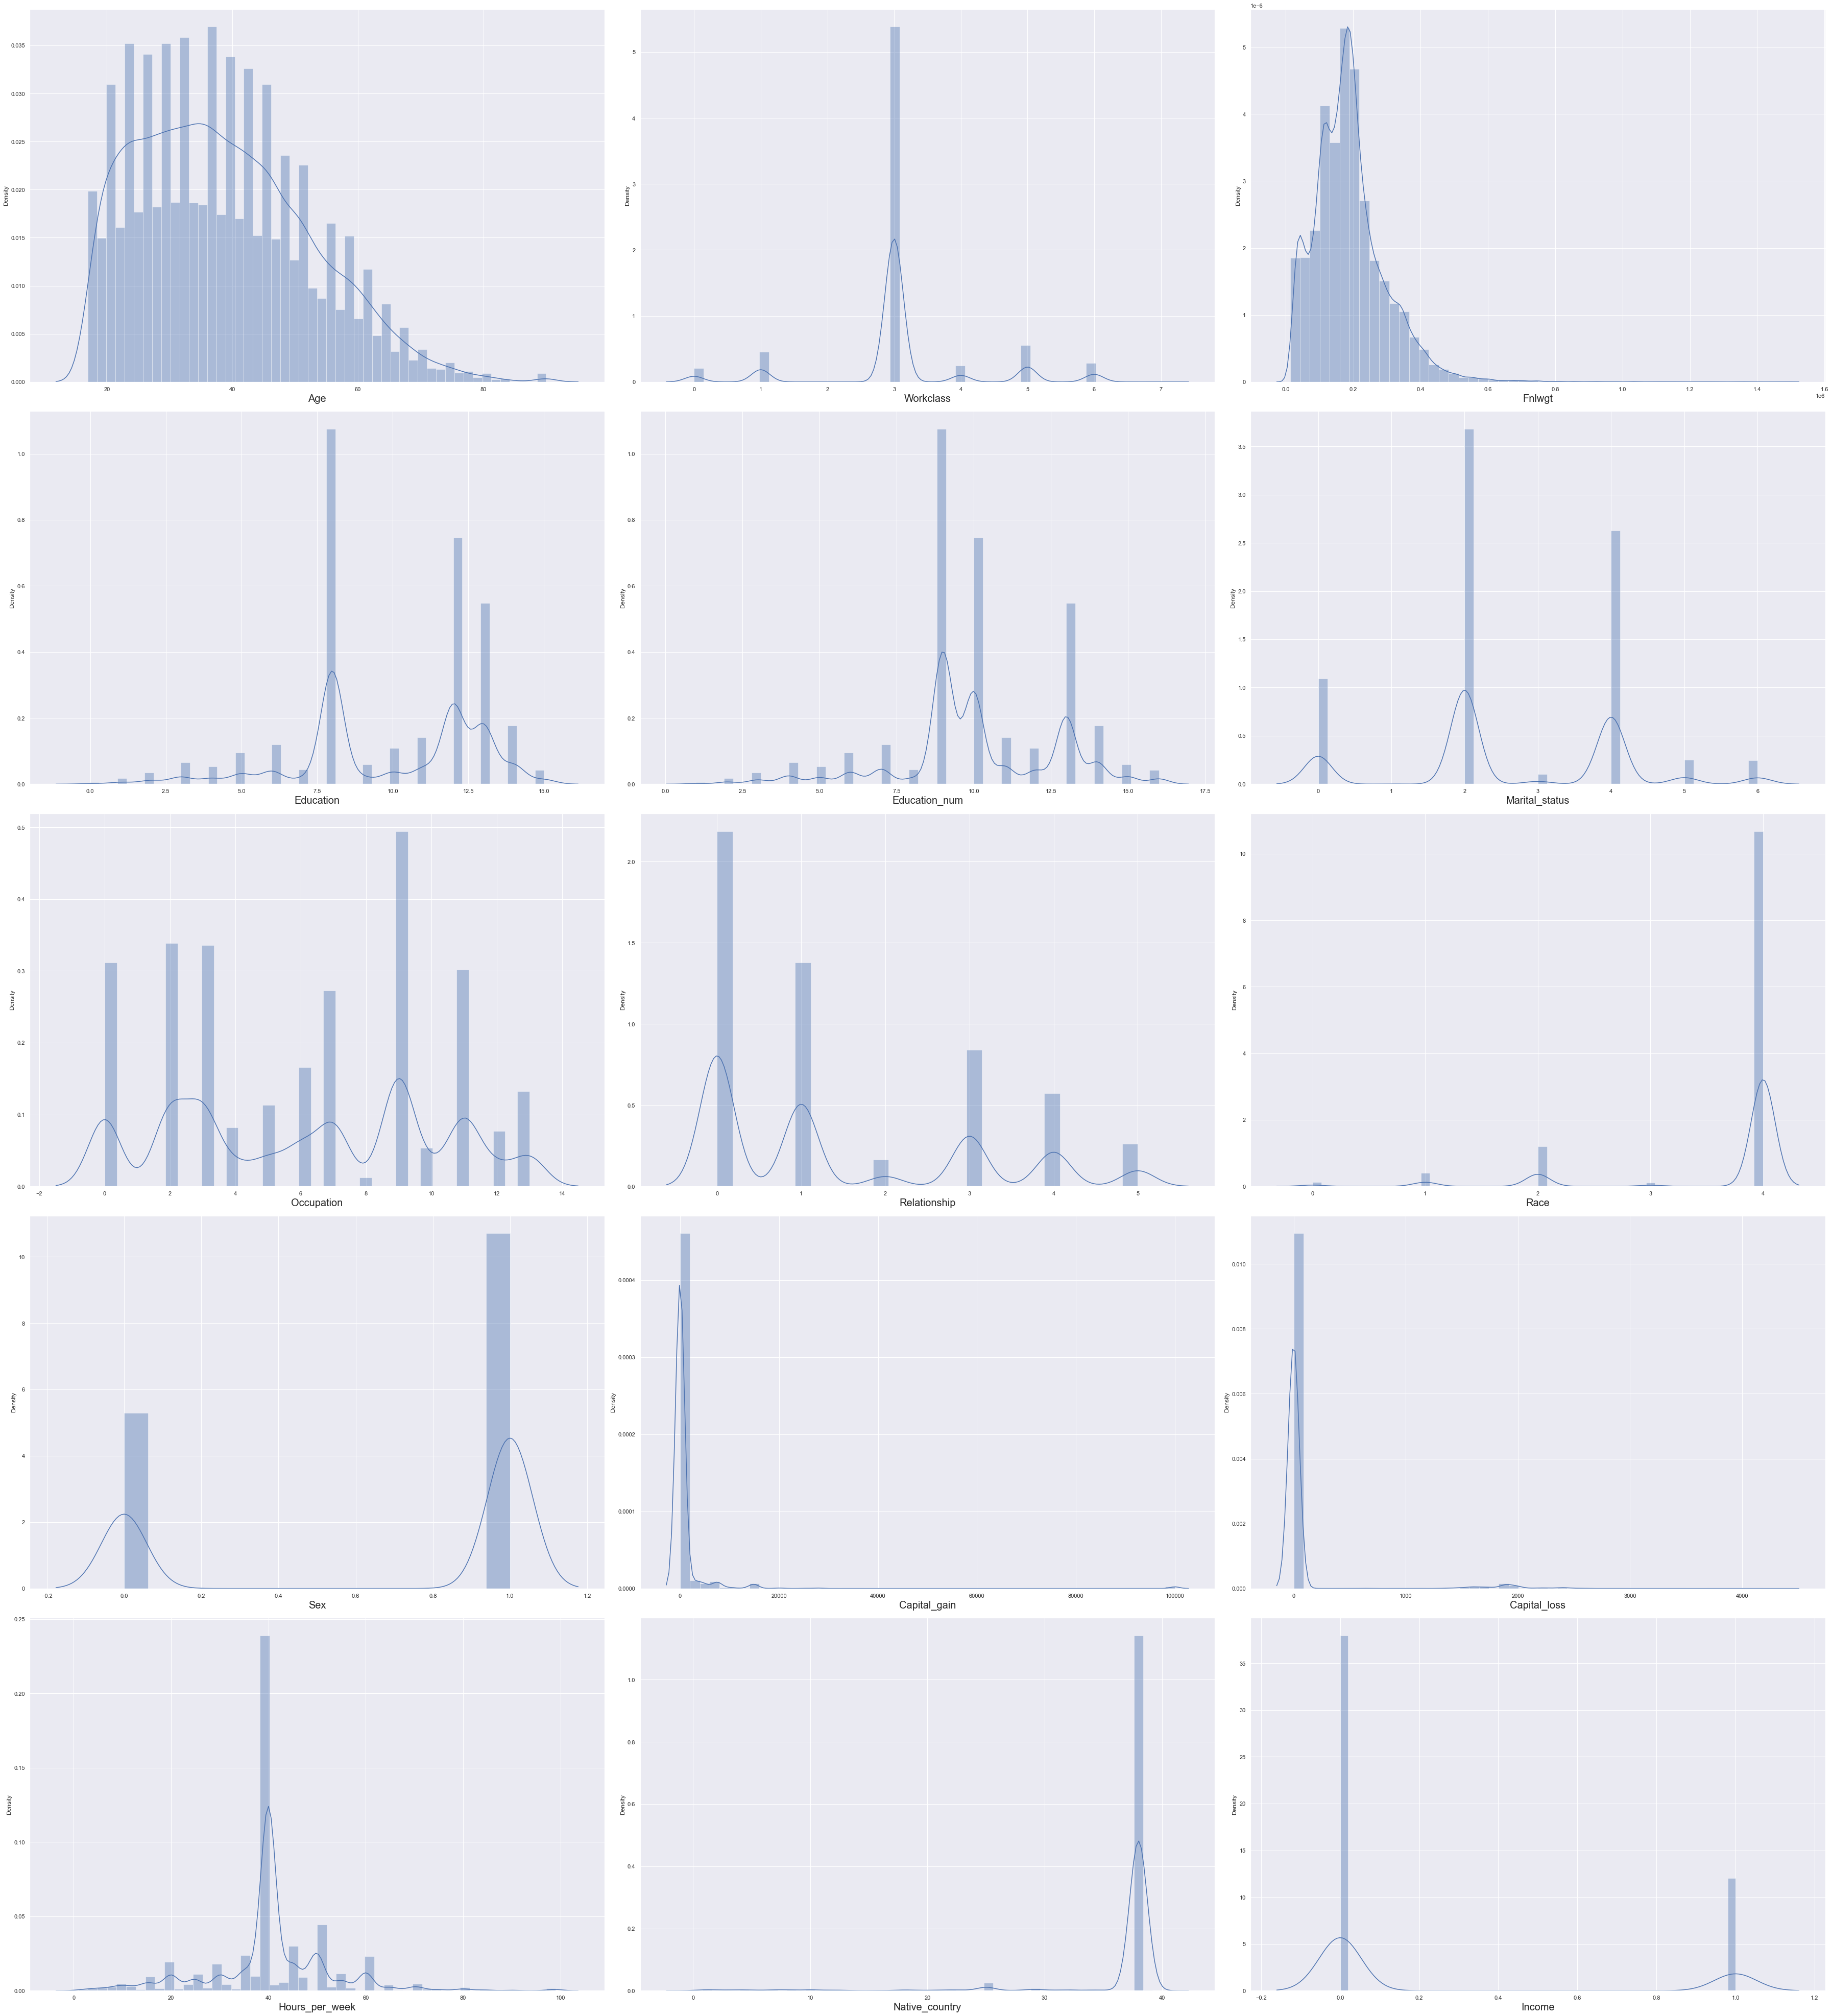

In [36]:
# let us now see the distribution of the dataset we have

plt.figure(figsize=(50,55), facecolor="white")
plotnumber = 1

for column in df:
    if plotnumber <=15:
        ax = plt.subplot(5,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

###  Z-Score

In [37]:
from scipy.stats import zscore

z_score = zscore(df[['Fnlwgt','Capital_gain','Capital_loss']])
abs_zscore = np.abs(z_score)

filtering_entry = (abs_zscore < 3).all(axis=1)

df = df[filtering_entry]



# the data now seems much better than before.

df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,30540.000000,30540.000000,30540.000000,30540.000000,30540.000000,30540.000000,30540.000000,30540.000000,30540.000000,30540.000000,30540.000000,30540.000000,30540.000000,30540.000000,30540.000000
mean,38.422266,3.092371,185191.385527,9.848821,10.022233,2.624787,6.127374,1.471087,3.664571,0.662901,570.462312,1.194892,40.242141,36.412967,0.222266
std,13.682629,1.102947,94694.342915,3.006564,2.546428,1.516054,3.973720,1.607388,0.851683,0.472727,2338.278639,32.416781,12.317602,6.057237,0.415776
min,17.000000,0.000000,12285.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,27.000000,3.000000,117444.000000,8.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,177631.000000,10.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,47.000000,3.000000,234658.500000,12.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,7.000000,506329.000000,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,22040.000000,1258.000000,99.000000,40.000000,1.000000


### Correlation 

In [38]:
corr_matrix = df.corr()
corr_matrix["Income"].sort_values(ascending=False)

Income            1.000000
Capital_gain      0.342320
Education_num     0.315532
Education         0.251319
Age               0.225228
Hours_per_week    0.217935
Sex               0.208955
Race              0.070361
Occupation        0.030490
Native_country    0.021008
Workclass        -0.007927
Fnlwgt           -0.010590
Capital_loss     -0.016533
Marital_status   -0.194861
Relationship     -0.244480
Name: Income, dtype: float64

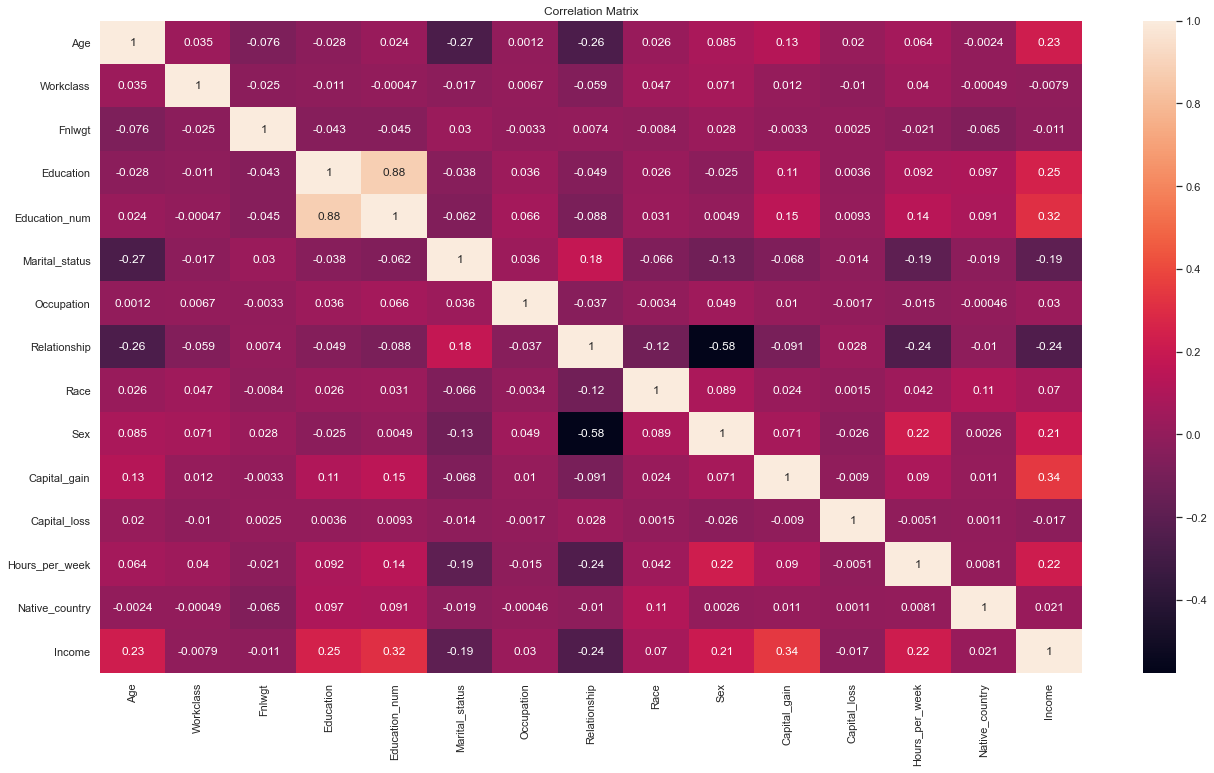

In [39]:
plt.figure(figsize=(22,12))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

#### Spliting the Dataset:

In [40]:
x = df.drop(columns = ["Income"], axis=1)
y = df["Income"]

In [41]:
x.skew()

Age                0.573867
Workclass          0.091137
Fnlwgt             0.631510
Education         -0.558812
Education_num     -0.322659
Marital_status    -0.035783
Occupation         0.001357
Relationship       0.754351
Race              -2.437529
Sex               -0.689243
Capital_gain       4.957644
Capital_loss      29.839094
Hours_per_week     0.224673
Native_country    -4.233935
dtype: float64

In [42]:
# Using StandardScaler


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.84617684,  1.7296038 , -1.07590433, ..., -0.03686089,
        -2.21167949,  0.26201044],
       [-0.03086196, -0.08375036,  0.32161492, ..., -0.03686089,
        -0.01965849,  0.26201044],
       [ 1.06543655, -0.08375036,  0.5230558 , ..., -0.03686089,
        -0.01965849,  0.26201044],
       ...,
       [ 1.43086938, -0.08375036, -0.35146693, ..., -0.03686089,
        -0.01965849,  0.26201044],
       [-1.20024704, -0.08375036,  0.17212096, ..., -0.03686089,
        -1.64337775,  0.26201044],
       [ 0.99234998,  0.82292672,  1.08493595, ..., -0.03686089,
        -0.01965849,  0.26201044]])

In [43]:
# Find VIF:


from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor( x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.174747,Age
1,1.009181,Workclass
2,1.014198,Fnlwgt
3,4.606487,Education
4,4.701868,Education_num
5,1.127058,Marital_status
6,1.012498,Occupation
7,1.666538,Relationship
8,1.031850,Race
9,1.547880,Sex


In [44]:
# Drop columns:

x.drop(['Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss'], axis = 1, inplace=True)

In [45]:
df["Income"].value_counts()

0    23752
1     6788
Name: Income, dtype: int64

In [46]:
# Using Smote:

#Handling class imbalance problem ny oversampling the moinority class

from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_over, y_over = SM.fit_resample(x,y)

In [47]:
y_over.value_counts()

0    23752
1    23752
Name: Income, dtype: int64

In [48]:
# Spliting Dataset:


x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.30, random_state = 200)

### HistGradientBoostingClassifier

In [49]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

hist_reg = HistGradientBoostingClassifier()
hist_reg.fit(x_train,y_train)

y_pred = hist_reg.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8599494807746281
[[5952 1158]
 [ 838 6304]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      7110
           1       0.84      0.88      0.86      7142

    accuracy                           0.86     14252
   macro avg       0.86      0.86      0.86     14252
weighted avg       0.86      0.86      0.86     14252



### DecisionTreeClassifier

In [50]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8452848722986247
[[5942 1168]
 [1037 6105]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      7110
           1       0.84      0.85      0.85      7142

    accuracy                           0.85     14252
   macro avg       0.85      0.85      0.85     14252
weighted avg       0.85      0.85      0.85     14252



### RandomForestClassifier

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8761577322481056
[[6144  966]
 [ 799 6343]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      7110
           1       0.87      0.89      0.88      7142

    accuracy                           0.88     14252
   macro avg       0.88      0.88      0.88     14252
weighted avg       0.88      0.88      0.88     14252



### GradientBoostingClassifier

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

gb_class = GradientBoostingClassifier()
gb_class.fit(x_train,y_train)

y_pred = gb_class.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8452848722986247
[[5747 1363]
 [ 842 6300]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      7110
           1       0.82      0.88      0.85      7142

    accuracy                           0.85     14252
   macro avg       0.85      0.85      0.85     14252
weighted avg       0.85      0.85      0.85     14252



### ExtraTreesClassifier

In [53]:
from sklearn.ensemble import ExtraTreesClassifier

ex_reg = ExtraTreesClassifier()
ex_reg.fit(x_train,y_train)

y_pred = ex_reg.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.870895312938535
[[6148  962]
 [ 878 6264]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      7110
           1       0.87      0.88      0.87      7142

    accuracy                           0.87     14252
   macro avg       0.87      0.87      0.87     14252
weighted avg       0.87      0.87      0.87     14252



### KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier

k_neigh = KNeighborsClassifier()
k_neigh.fit(x_train,y_train)

y_pred = k_neigh.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8277434746000562
[[5257 1853]
 [ 602 6540]]
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      7110
           1       0.78      0.92      0.84      7142

    accuracy                           0.83     14252
   macro avg       0.84      0.83      0.83     14252
weighted avg       0.84      0.83      0.83     14252



### Cross Validation:

In [55]:
from sklearn.model_selection import cross_val_score


scr = cross_val_score(hist_reg, x, y, cv=3)
print("Cross Validation score of HistGradientBoostingClassifier model is:", scr.mean())

scr = cross_val_score(dt, x, y, cv=3)
print("Cross Validation score of DecisionTreeClassifier model is:", scr.mean())

scr = cross_val_score(rf, x, y, cv=3)
print("Cross Validation score of RandomForestClassifier model is:", scr.mean())

scr = cross_val_score(gb_class, x, y, cv=3)
print("Cross Validation score of GradientBoostingClassifier model is:", scr.mean())

scr = cross_val_score(ex_reg, x, y, cv=3)
print("Cross Validation score of ExtraTreesClassifier model is:", scr.mean())

scr = cross_val_score(k_neigh, x, y, cv=3)
print("Cross Validation score of KNeighborsClassifier model is:", scr.mean())

Cross Validation score of HistGradientBoostingClassifier model is: 0.8445972495088409
Cross Validation score of DecisionTreeClassifier model is: 0.7862148002619516
Cross Validation score of RandomForestClassifier model is: 0.824557956777996
Cross Validation score of GradientBoostingClassifier model is: 0.8430255402750492
Cross Validation score of ExtraTreesClassifier model is: 0.818664047151277
Cross Validation score of KNeighborsClassifier model is: 0.8020628683693517


### ROC AUC score

In [56]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [58]:
#ROC AUC score for HistGradientBoostingClassifier

roc_auc_score(y_test, hist_reg.predict(x_test))

0.8598983607990764

In [59]:
#ROC AUC score for DecisionTreeClassifier

roc_auc_score(y_test, dt.predict(x_test))

0.8452634541180104

In [60]:
#ROC AUC score for RandomForestClassifier

roc_auc_score(y_test, rf.predict(x_test))

0.8761307981430346

In [61]:
#ROC AUC score for GradientBoostingClassifier

roc_auc_score(y_test, gb_class.predict(x_test))

0.8452020121458176

In [62]:
#ROC AUC score for ExtraTreesClassifier

roc_auc_score(y_test, ex_reg.predict(x_test))

0.870881428415573

In [63]:
#ROC AUC score for KNeighborsClassifier

roc_auc_score(y_test, k_neigh.predict(x_test))

0.8275455192457131

### ROC AUC score plots


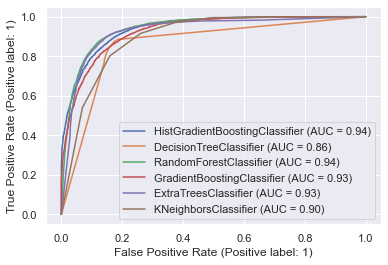

In [72]:
disp = plot_roc_curve(hist_reg, x_test, y_test)

plot_roc_curve(dt, x_test, y_test, ax=disp.ax_)

plot_roc_curve(rf, x_test, y_test, ax=disp.ax_)

plot_roc_curve(gb_class, x_test, y_test, ax=disp.ax_)

plot_roc_curve(ex_reg, x_test, y_test, ax=disp.ax_)

plot_roc_curve(k_neigh, x_test, y_test, ax=disp.ax_)



plt.legend(prop={"size":11}, loc="lower right")

plt.show()

### Hyper Parameter Tuning


In [86]:
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth':(2,3,4,5),
    'n_estimators':(50,100,150,200,250)
}

In [74]:
grid = GridSearchCV(GradientBoostingClassifier()
                    ,param_grid=params,cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': (2, 3, 4, 5),
                         'n_estimators': (50, 100, 150, 200, 250)})

In [75]:
best_param=grid.best_params_
best_param

{'max_depth': 5, 'n_estimators': 250}

In [76]:
gb_tuned=GradientBoostingClassifier(n_estimators=200,max_depth=3)
gb_tuned.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=200)

In [77]:
# getting diff parameter of tuned model:

y_pred_gb = gb_tuned.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', gb_tuned.score(x_train,y_train))
print('TESTING SCORE : ', gb_tuned.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(classification_report(y_test,y_pred_gb))

TRAINING SCORE :  0.8609406952965235
TESTING SCORE :  0.8567920291888858
ACCURACY : 0.8277434746000562
*****************************
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      7110
           1       0.84      0.88      0.86      7142

    accuracy                           0.86     14252
   macro avg       0.86      0.86      0.86     14252
weighted avg       0.86      0.86      0.86     14252



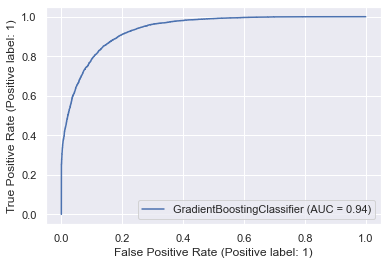

In [79]:
plot_roc_curve(gb_tuned,x_test,y_test)

## Save The Model:

In [83]:
import joblib
joblib.dump(gb_tuned,'Census_Income.pkl')

['Census_Income.pkl']

In [84]:
model = joblib.load("Census_Income.pkl")

In [85]:
prediction = model.predict(x_test)
prediction=pd.DataFrame(prediction)
prediction

,0
0,0
1,1
2,1
3,1
4,0
...,...
14247,1
14248,1
14249,1
14250,1
